In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter




np.random.seed(0)
minutes = 1440
base_traffic = np.random.poisson(lam=60, size=minutes)
noise = np.random.normal(0, 10, size=minutes)
vehicle_count = base_traffic + noise
vehicle_count = np.clip(vehicle_count, 0, None)

print(vehicle_count)

[58.43349865 61.61523342 62.04314343 ... 78.76679257 38.28783506
 69.98852843]


In [50]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff=0.1, fs=1.0, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

filtered_count = lowpass_filter(vehicle_count)

In [51]:
hourly_averages = np.array([np.mean(vehicle_count[i*60:(i+1)*60]) for i in range(24)])
print(hourly_averages)



[59.47509776 60.50827033 58.60870782 59.32596803 58.36507427 59.20118058
 60.63946873 58.70394682 61.17025532 59.33671348 59.31266091 58.65606805
 61.74724122 61.83031749 61.22992584 61.80236505 58.2382664  59.97210796
 60.1774908  60.8806129  56.35811387 61.23505461 59.1802854  60.24967063]


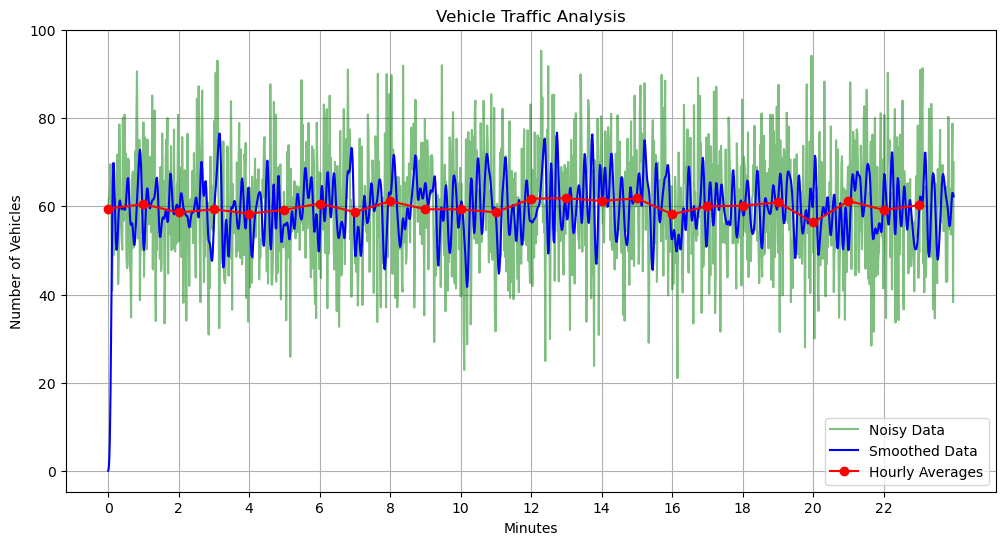

In [52]:
#4th part

plt.figure(figsize=(12, 6))

plt.plot(vehicle_count, label='Noisy Data', color='green', alpha=0.5)
plt.plot(filtered_count, label='Smoothed Data', color='blue')
plt.plot(np.arange(0, 1440, 60), hourly_averages, 'ro-', label='Hourly Averages')

plt.title('Vehicle Traffic Analysis')
plt.xlabel('Minutes')
plt.ylabel('Number of Vehicles')

x_tick = np.arange(0, 1440, 120)
lab = [f'{i//60}' for i in range(0, 1440, 120)]
plt.xticks(ticks=x_tick, labels=lab)
plt.legend()
plt.grid()
plt.show()

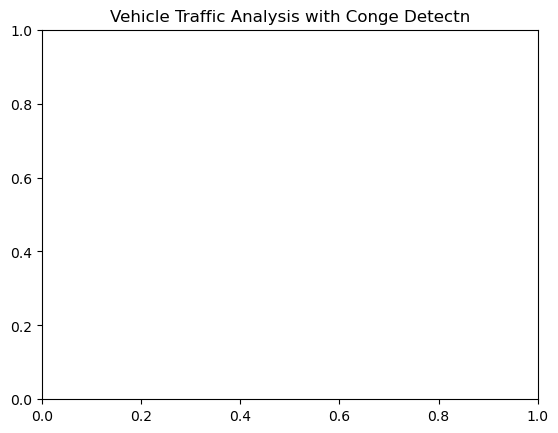

In [53]:
def detect_congestion(vehicle_counts, threshold=120, duration=15):
    congestion_intervals = []
    count = 0
    start = None

    for i, count in enumerate(vehicle_counts):
        if count > threshold:
            if count == 1:  
                start = i
            count += 1
        else:
            if start is not None and count >= duration:
                congestion_intervals.append((start, i-1))
            start = None
            count = 0

            
    if start is not None and count >= duration:
        congestion_intervals.append((start, len(vehicle_counts) - 1))

    return congestion_intervals

congestion_intervals = detect_congestion(vehicle_count)

for start, end in congestion_intervals:
    plt.axvspan(start, end, color='red', alpha=0.5, label='Congestion Period' if start == congestion_intervals[0][0] else "")

# plt.legend()
plt.title('Vehicle Traffic Analysis with Conge Detectn')
plt.show()

